# WeatherPy

## Observations

### 1. In the temperature vs latitude plot, it appears there is an observable trend of higher temperatures when getting closer to latitude zero, and lower temperatures as the latitudes get further away from zero. It is not linear and there as there are a variety of tempeartures near the equator that are all pretty similar from -20 to +20 latitude.

### 2. The southern hemisphere appears to have a stronger correlation of higher temperature when closer to the equator and lower temps when further away than the northern hemispher. Additionally when looking at the respectve "r" values for the southern and northern hemispheres, the southern "r" value is higher indicating a stronger correlation.

### 3. All humidity, wind speed, and cloudiness have much weaker correlations than temperatures when it comes to separation from the equator. None of those have as close to an observable trend as temperature.

## Dependencies, and random city generation

In [1]:
# Dependencies
import pandas as pd
import requests
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from citipy import citipy

#import API key
from api_keys import weather_api_key

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

## Data Collection/API Requests

In [5]:
#create lists and empty DF for entry with data from API request
city_num = []
cities_found = []
temp = []
lat = []
lng = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cities_df = pd.DataFrame()
cities_df["City #"] = ""
cities_df["City"] = ""
cities_df["Temp"] = ""
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""                       
cities_df["Humidity"] = ""                         
cities_df["Cloudiness"] = ""                         
cities_df["Wind Speed"] = ""   
cities_df["Country"] = ""   
cities_df["Date"] = ""   

In [6]:
# set up query url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
city_number = 1

In [7]:
# loop through cities list and put through request/json response to find data
for city in cities:
    url = query_url + city
    response = requests.get(url)
    data = response.json()
    
    # try and except for the lists to fill in - this will create a print log to show which cities have data from the request/response
    try:        
        temp.append(data['main']['temp_max'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        cities_found.append(city)
        print(f"City Record # {city_number} found |  {city}")
        city_num.append(city_number)
        city_number +=1
    # exception for when city is not found
    except:
        print("Record not found")
        city_number = city_number

City Record # 1 found |  harper
City Record # 2 found |  puerto narino
City Record # 3 found |  smithers
City Record # 4 found |  richards bay
City Record # 5 found |  pingyin
City Record # 6 found |  thompson
City Record # 7 found |  fairbanks
City Record # 8 found |  rikitea
City Record # 9 found |  sao filipe
City Record # 10 found |  ushuaia
City Record # 11 found |  ponta do sol
City Record # 12 found |  port alfred
City Record # 13 found |  elban
City Record # 14 found |  jamestown
City Record # 15 found |  new norfolk
City Record # 16 found |  madimba
City Record # 17 found |  bethel
City Record # 18 found |  kutum
City Record # 19 found |  albany
City Record # 20 found |  sapa
City Record # 21 found |  taltal
City Record # 22 found |  atuona
City Record # 23 found |  mataura
City Record # 24 found |  carnarvon
City Record # 25 found |  punta arenas
City Record # 26 found |  tautira
City Record # 27 found |  kapaa
City Record # 28 found |  katangli
City Record # 29 found |  arad

Record not found
City Record # 223 found |  novoagansk
City Record # 224 found |  ribeira grande
City Record # 225 found |  cidreira
City Record # 226 found |  lamar
City Record # 227 found |  juba
City Record # 228 found |  saldanha
City Record # 229 found |  kahului
City Record # 230 found |  pacific grove
City Record # 231 found |  tuusula
City Record # 232 found |  victoria
City Record # 233 found |  atar
City Record # 234 found |  vardo
City Record # 235 found |  neubiberg
Record not found
City Record # 236 found |  mayo
Record not found
City Record # 237 found |  necochea
City Record # 238 found |  kodiak
City Record # 239 found |  iqaluit
City Record # 240 found |  russell
City Record # 241 found |  jalu
City Record # 242 found |  rio gallegos
City Record # 243 found |  namwala
Record not found
Record not found
City Record # 244 found |  visby
City Record # 245 found |  kudahuvadhoo
City Record # 246 found |  charlestown
City Record # 247 found |  yilan
City Record # 248 found |

City Record # 439 found |  saint-augustin
City Record # 440 found |  veraval
City Record # 441 found |  nasirabad
Record not found
City Record # 442 found |  belgaum
City Record # 443 found |  kasongo-lunda
City Record # 444 found |  boa vista
City Record # 445 found |  aswan
City Record # 446 found |  cherdakly
Record not found
City Record # 447 found |  kirakira
City Record # 448 found |  havelock
Record not found
City Record # 449 found |  klaksvik
City Record # 450 found |  kurilsk
City Record # 451 found |  rurrenabaque
City Record # 452 found |  pacatuba
City Record # 453 found |  sembe
City Record # 454 found |  hyeres
City Record # 455 found |  ust-ilimsk
City Record # 456 found |  san quintin
City Record # 457 found |  mangualde
City Record # 458 found |  saint-joseph
Record not found
City Record # 459 found |  raudeberg
City Record # 460 found |  bathsheba
City Record # 461 found |  puerto del rosario
City Record # 462 found |  puerto ayacucho
City Record # 463 found |  port 

In [8]:
# find length of cities
len(city_num)

570

In [9]:
# fill in empyt columns from previously created empty DF
cities_df["City #"] = city_num
cities_df["City"] = cities_found
cities_df["Temp"] = temp
cities_df["Latitude"] = lat
cities_df["Longitude"] = lng                      
cities_df["Humidity"] = humidity                       
cities_df["Cloudiness"] = cloudiness                         
cities_df["Wind Speed"] = wind_speed  
cities_df["Country"] = country  
cities_df["Date"] = date
cities_df

,City #,City,Temp,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,harper,75.43,4.3750,-7.7169,91,21,7.16,LR,1662329215
1,2,puerto narino,83.39,-3.7703,-70.3831,73,81,2.15,CO,1662329216
2,3,smithers,65.34,54.7804,-127.1743,41,89,4.14,CA,1662329052
3,4,richards bay,72.30,-28.7830,32.0377,50,0,14.74,ZA,1662329216
4,5,pingyin,68.36,36.2831,116.4453,76,100,5.46,CN,1662329216
...,...,...,...,...,...,...,...,...,...,...
565,566,xingyi,57.34,24.1877,102.8170,79,100,3.47,CN,1662329415
566,567,hof,64.51,50.3167,11.9167,76,86,1.99,DE,1662329416
567,568,xai-xai,65.03,-25.0519,33.6442,68,0,11.52,MZ,1662329416
568,569,tecoanapa,78.04,16.5167,-98.7500,86,100,14.63,MX,1662329417


## Export Data

In [10]:
# export the above CSV for use in VacationPy
cities_df.to_csv("cities_submit.csv") 

## Scatter Plots for weather features vs Latitude

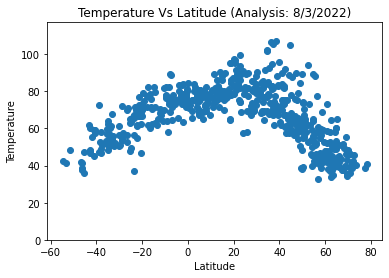

In [53]:
# scatter plot of temp vs latitude
plt.scatter(cities_df["Latitude"], cities_df["Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0, max(temp)+10)
plt.savefig("output_images/all_temperature_lat.png", dpi=500)
plt.show()


The above plot demonstrates the maximum tempartures of the Cities generated in the random Citipy command against the Latitude of each specific city. The temparture and latitude were determined in the for loop above.

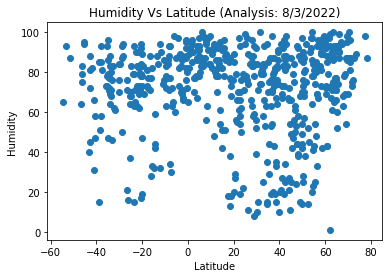

In [52]:
plt.scatter(cities_df["Latitude"], cities_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity Vs Latitude (Analysis: 8/3/2022)")
plt.savefig("output_images/all_humidity_lat.png", dpi=500)
plt.show()


The above plot demonstrates the humidity of the Cities generated in the random Citipy command against the Latitude of each specific city. The humidity and latitude were determined in the for loop above.

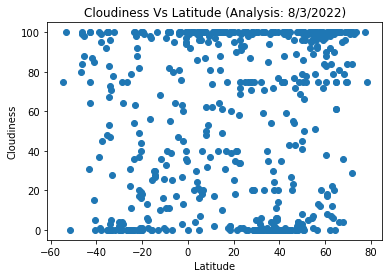

In [51]:
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness Vs Latitude (Analysis: 8/3/2022)")

plt.savefig("output_images/all_cloudiness_lat.png", dpi=500)
plt.show()

The above plot demonstrates the cloudiness of the Cities generated in the random Citipy command against the Latitude of each specific city. The temparture and cloudiness were determined in the for loop above.

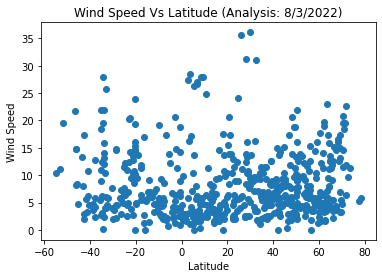

In [50]:
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed Vs Latitude (Analysis: 8/3/2022)")

plt.savefig("output_images/all_wind_speed_lat.png", dpi=500)
plt.show()

The above plot demonstrates the wind speed of the Cities generated in the random Citipy command against the Latitude of each specific city. The wind speed and latitude were determined in the for loop above.

## Scatter Plots and Linear Regression for Hemisphere weather features vs Latitude

In [34]:
# generate northern hempisphere DF for plotting purposes
north_hemi_cities_df = cities_df.loc[cities_df["Latitude"] > 0, :]
north_hemi_cities_df

,City #,City,Temp,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,harper,75.43,4.3750,-7.7169,91,21,7.16,LR,1662329215
2,3,smithers,65.34,54.7804,-127.1743,41,89,4.14,CA,1662329052
4,5,pingyin,68.36,36.2831,116.4453,76,100,5.46,CN,1662329216
5,6,thompson,88.23,55.7435,-97.8558,25,51,10.71,CA,1662329067
6,7,fairbanks,60.10,64.8378,-147.7164,71,100,12.66,US,1662329217
...,...,...,...,...,...,...,...,...,...,...
564,565,sakakah,90.46,29.9697,40.2064,10,0,5.12,SA,1662329415
565,566,xingyi,57.34,24.1877,102.8170,79,100,3.47,CN,1662329415
566,567,hof,64.51,50.3167,11.9167,76,86,1.99,DE,1662329416
568,569,tecoanapa,78.04,16.5167,-98.7500,86,100,14.63,MX,1662329417


In [35]:
# generate southern hempisphere DF for plotting purposes
south_hemi_cities_df = cities_df.loc[cities_df["Latitude"] < 0, :]
south_hemi_cities_df

,City #,City,Temp,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Country,Date
1,2,puerto narino,83.39,-3.7703,-70.3831,73,81,2.15,CO,1662329216
3,4,richards bay,72.30,-28.7830,32.0377,50,0,14.74,ZA,1662329216
7,8,rikitea,71.58,-23.1203,-134.9692,65,63,20.20,PF,1662329217
9,10,ushuaia,42.46,-54.8000,-68.3000,65,75,10.36,AR,1662329218
11,12,port alfred,61.18,-33.5906,26.8910,71,5,4.00,ZA,1662329218
...,...,...,...,...,...,...,...,...,...,...
548,549,touros,75.18,-5.1989,-35.4608,87,17,12.19,BR,1662329409
551,552,port augusta,50.63,-32.5000,137.7667,62,100,4.52,AU,1662329410
552,553,kiama,57.00,-34.6833,150.8667,78,53,3.00,AU,1662329411
556,557,mwene-ditu,71.60,-7.0000,23.4500,63,25,1.88,CD,1662329412


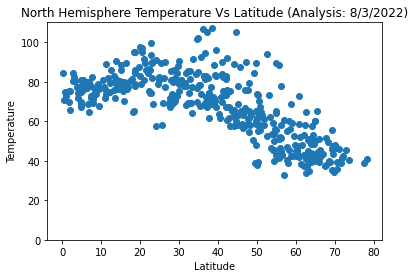

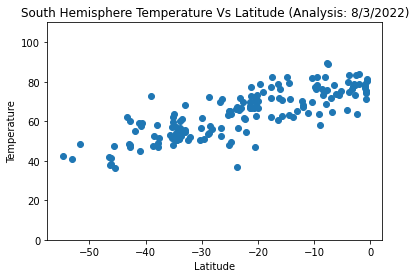

In [36]:
# scatter plot of temp vs latitude for northern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(north_hemi_cities_df["Latitude"], north_hemi_cities_df["Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("North Hemisphere Temperature Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,110)
plt.show()

# scatter plot of temp vs latitude for southern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(south_hemi_cities_df["Latitude"], south_hemi_cities_df["Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("South Hemisphere Temperature Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,110)
plt.show()

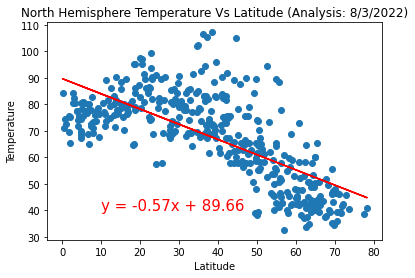

In [37]:
#Latitude and temperature as x and y values
x_values = north_hemi_cities_df['Latitude'].astype('float')
y_values = north_hemi_cities_df['Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("North Hemisphere Temperature Vs Latitude (Analysis: 8/3/2022)")

plt.savefig("output_images/north_hemi_temperature_lat.png")
plt.show()

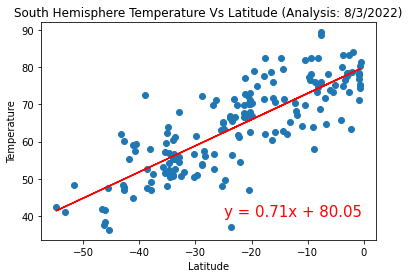

In [38]:
#Latitude and temperature as x and y values
x_values = south_hemi_cities_df['Latitude'].astype('float')
y_values = south_hemi_cities_df['Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("South Hemisphere Temperature Vs Latitude (Analysis: 8/3/2022)")

plt.savefig("output_images/south_hemi_temperature_lat.png")
plt.show()

The above two plots demonstrate the maximum tempurature of the Cities in the northern hemisphere and southern hemisphere respectively generated in the random Citipy command against the Latitude of each specific city. The max temperature and latitude were determined in the for loop above.

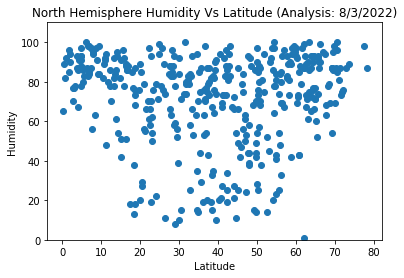

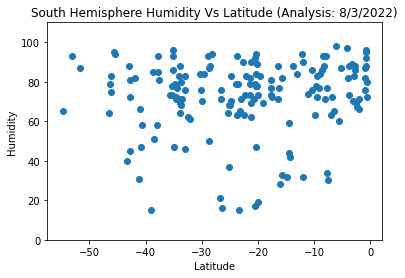

In [39]:
# scatter plot of humidity vs latitude for northern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(north_hemi_cities_df["Latitude"], north_hemi_cities_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("North Hemisphere Humidity Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,110)
plt.show()

# scatter plot of humidity vs latitude for southern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(south_hemi_cities_df["Latitude"], south_hemi_cities_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("South Hemisphere Humidity Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,110)
plt.show()

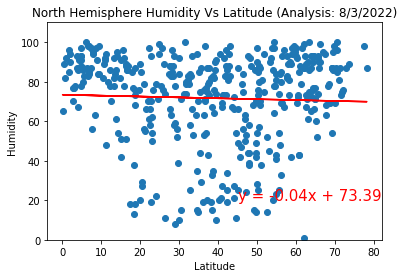

In [40]:
#Latitude and humidity as x and y values
x_values = north_hemi_cities_df['Latitude'].astype('float')
y_values = north_hemi_cities_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.ylim(0,110)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("North Hemisphere Humidity Vs Latitude (Analysis: 8/3/2022)")

plt.savefig("output_images/north_hemi_humidity_lat.png")
plt.show()

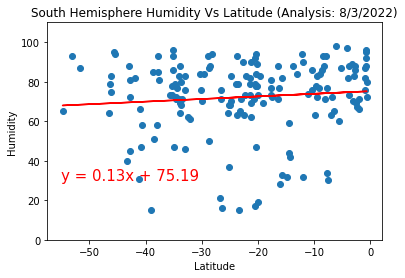

In [41]:
#Latitude and humidity as x and y values
x_values = south_hemi_cities_df['Latitude'].astype('float')
y_values = south_hemi_cities_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.ylim(0,110)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("South Hemisphere Humidity Vs Latitude (Analysis: 8/3/2022)")

plt.savefig("output_images/south_hemi_humidity_lat.png")
plt.show()

The above two plots demonstrate the humidity of the Cities in the northern hemisphere and southern hemisphere respectively generated in the random Citipy command against the Latitude of each specific city. The max humidity and latitude were determined in the for loop above.

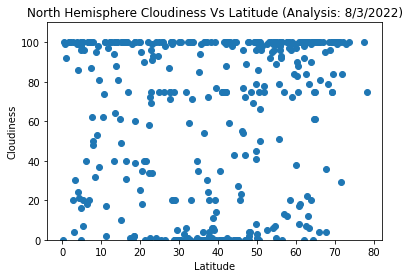

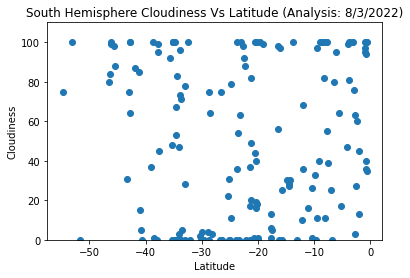

In [42]:
# scatter plot of cloudiness vs latitude for northern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(north_hemi_cities_df["Latitude"], north_hemi_cities_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("North Hemisphere Cloudiness Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,110)
plt.show()

# scatter plot of cloudiness vs latitude for southern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(south_hemi_cities_df["Latitude"], south_hemi_cities_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("South Hemisphere Cloudiness Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,110)
plt.show()

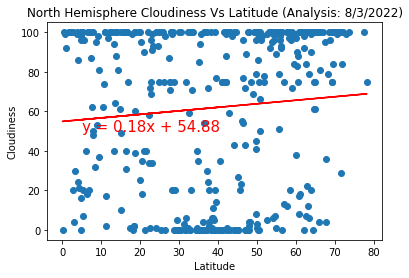

In [43]:
#Latitude and cloudiness as x and y values
x_values = north_hemi_cities_df['Latitude'].astype('float')
y_values = north_hemi_cities_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("North Hemisphere Cloudiness Vs Latitude (Analysis: 8/3/2022)")

plt.savefig("output_images/north_hemi_cloudiness_lat.png")
plt.show()

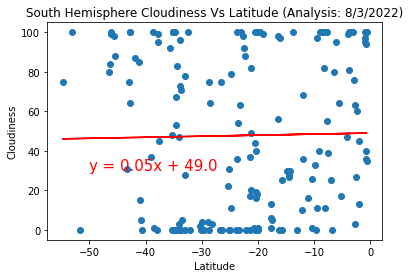

In [44]:
#Latitude and cloudiness as x and y values
x_values = south_hemi_cities_df['Latitude'].astype('float')
y_values = south_hemi_cities_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("South Hemisphere Cloudiness Vs Latitude (Analysis: 8/3/2022)")

plt.savefig("output_images/south_hemi_cloudiness_lat.png")
plt.show()

The above two plots demonstrate the cloudiness of the Cities in the northern hemisphere and southern hemisphere respectively generated in the random Citipy command against the Latitude of each specific city. The max cloudiness and latitude were determined in the for loop above.

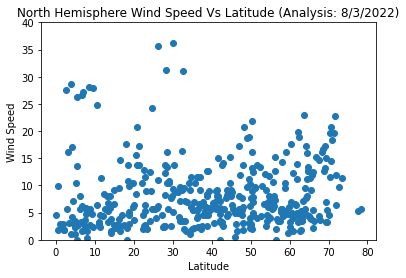

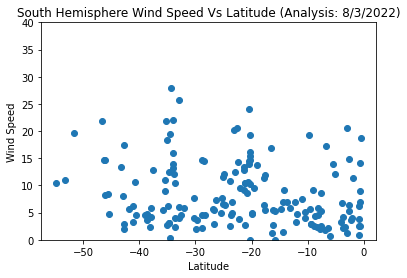

In [45]:
# scatter plot of wind speed vs latitude for northern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(north_hemi_cities_df["Latitude"], north_hemi_cities_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("North Hemisphere Wind Speed Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,40)
plt.show()

# scatter plot of wind speed vs latitude for southern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(south_hemi_cities_df["Latitude"], south_hemi_cities_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("South Hemisphere Wind Speed Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,40)
plt.show()

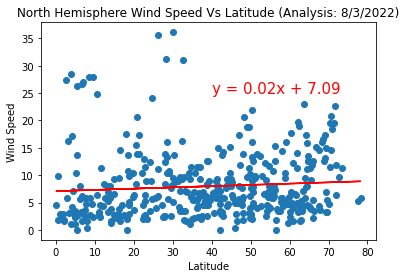

In [46]:
#Latitude and wind speed as x and y values
x_values = north_hemi_cities_df['Latitude'].astype('float')
y_values = north_hemi_cities_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("North Hemisphere Wind Speed Vs Latitude (Analysis: 8/3/2022)")

plt.savefig("output_images/north_hemi_wind_speed_lat.png")
plt.show()

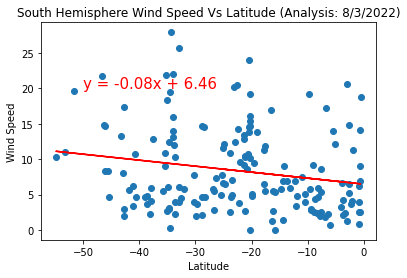

In [47]:
#Latitude and wind speed as x and y values
x_values = south_hemi_cities_df['Latitude'].astype('float')
y_values = south_hemi_cities_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("South Hemisphere Wind Speed Vs Latitude (Analysis: 8/3/2022)")

plt.savefig("output_images/south_hemi_wind_speed_lat.png")
plt.show()

The above two plots demonstrate the wind speed of the Cities in the northern hemisphere and southern hemisphere respectively generated in the random Citipy command against the Latitude of each specific city. The max wind speed and latitude were determined in the for loop above.